In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/Car dekho.csv")
df

,Name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Alto 800 LXI Opt,2023,410000,10000,Petrol,Individual,Manual,First Owner,19.03 kmpl,999 CC,71.01bhp,96Nm,5.0
1,Skoda Slavia 1.0 TSI Ambition,2023,1350000,10000,Petrol,Individual,Manual,First Owner,14.08 kmpl,1956 CC,167.67bhp,350nm,5.0
2,BMW 3 Series Gran Limousine 320Ld Luxury Line,2023,5800000,1000,Diesel,Dealer,Automatic,First Owner,18.15 kmpl,998 CC,118.35bhp,172Nm,5.0
3,MG ZS EV Exclusive,2023,2650000,10000,Electric,Dealer,Automatic,First Owner,32.52 kmpl,998 CC,58.33bhp,78Nm,5.0
4,Tata Punch Adventure,2023,715000,10000,Petrol,Individual,Manual,First Owner,12.15 kmpl,1451 CC,141bhp,250Nm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8143,Ambassador Classic 2000 DSZ AC PS,1994,99000,100000,Diesel,Individual,Manual,Second Owner,12.8 kmpl,1995 CC,52 bhp,106Nm@ 2200rpm,5.0
8144,Mahindra Jeep CL 500 MDI,1994,120000,100000,Diesel,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
8145,Maruti 800 AC,1994,45000,60000,Petrol,Individual,Manual,First Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8146,Maruti Omni LPG STD BSIV,1991,55000,120000,LPG,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

df["mileage"] = df["mileage"].str.strip(" kmplg/")
df["mileage"] = df["mileage"].astype(float)

df["engine"] = df["engine"].str.strip(" C")
df["engine"] = df["engine"].astype(int)

df["max_power"] = df["max_power"].str.strip(" bhp")
df["max_power"] = df["max_power"].astype(float)

df["torque"] = df["torque"].apply(func = lambda x : x.upper().split()[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("N")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("K")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("@")[0])
df["torque"] = df["torque"].apply(func = lambda x : x.upper().split("(")[0])
df["torque"] = df["torque"].astype(float)

df["Company"] = df["Name"].apply(func = lambda x : x.split()[0])

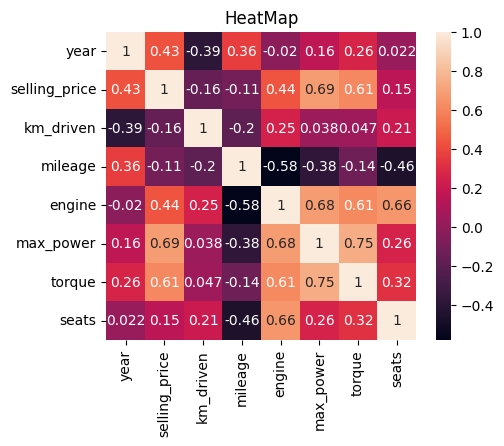

In [ ]:
plt.figure(figsize=(5,4))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.title("HeatMap")
plt.show()

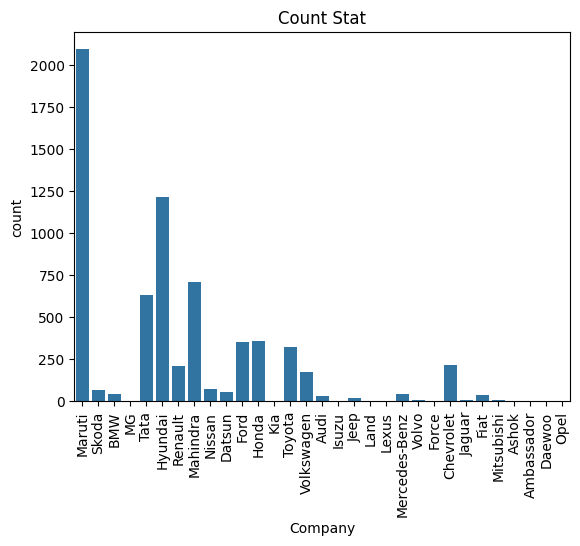

In [ ]:
sns.countplot(x = df["Company"])
plt.title("Count Stat")
plt.xticks(rotation = 90)
plt.show()

In [ ]:
df.groupby("fuel")["selling_price"].min()

,selling_price
fuel,
CNG,120000
Diesel,45000
Electric,2650000
LPG,54000
Petrol,29999


In [ ]:
num = []
obj = []
for i in df:
  if df[i].dtype == "float" or df[i].dtype == "int":
    num.append(i)
  elif df[i].dtype == "object":
    obj.append(i)
print("Numerical Columns:",num)
print("Object Columns:",obj)

Numerical Columns: ['year', 'selling_price', 'km_driven', 'mileage', 'engine', 'max_power', 'torque', 'seats']
Object Columns: ['Name', 'fuel', 'seller_type', 'transmission', 'owner', 'Company']


In [ ]:
df.groupby("fuel")[num].min()

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats
fuel,,,,,,,,
CNG,2008,120000,1,11.88,796,38.40,12.5,4.0
Diesel,1994,45000,1000,0.00,793,35.50,8.5,2.0
Electric,2023,2650000,10000,32.52,998,58.33,78.0,5.0
LPG,2006,54000,30000,10.90,796,32.80,5.7,5.0
Petrol,1994,29999,1000,0.00,624,34.20,4.8,4.0


In [ ]:
for i in obj:
  print(df.groupby(i)[num].min())
  print()

                                                year  selling_price  \
Name                                                                  
 BMW 3 Series Gran Limousine 320Ld Luxury Line  2023        5800000   
 Hyundai Creta SX Diesel AT                     2021        1950000   
 Hyundai Creta SX Turbo                         2022        1895000   
 Hyundai Tucson Platinum AT                     2021        2975000   
 Hyundai i20 Sportz Diesel                      2021         977000   
...                                              ...            ...   
Volvo V40 D3 R-Design                           2018        2475000   
Volvo XC40 D4 Inscription BSIV                  2019        3800000   
Volvo XC40 D4 R-Design                          2018        3400000   
Volvo XC60 Inscription D5 BSIV                  2018        5500000   
Volvo XC90 T8 Excellence BSIV                   2017       10000000   

                                                km_driven  mileage  engine  

In [ ]:
# yesterday class programs pending

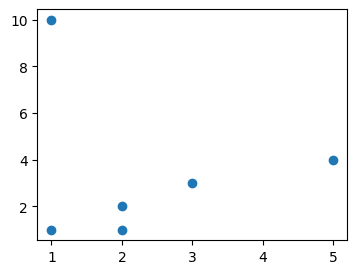

In [ ]:
x = [3,2,1,5,1,2]
y = [3,2,1,4,10,1]
plt.figure(figsize=(4,3))
plt.scatter(x,y)
plt.show()